<a href="https://colab.research.google.com/github/astrovishalthakur/MachineLearning/blob/main/Ensemble/Voting/VotingEnsembleClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris

In [36]:
iris = load_iris()

In [52]:
iris.data.shape, iris.target.shape

((150, 4), (150,))

In [57]:
df = pd.DataFrame(data = np.concatenate((iris.data, iris.target.reshape(150,1)), axis=1), columns=iris.feature_names + ["Species"]).astype({"Species": int})

In [58]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


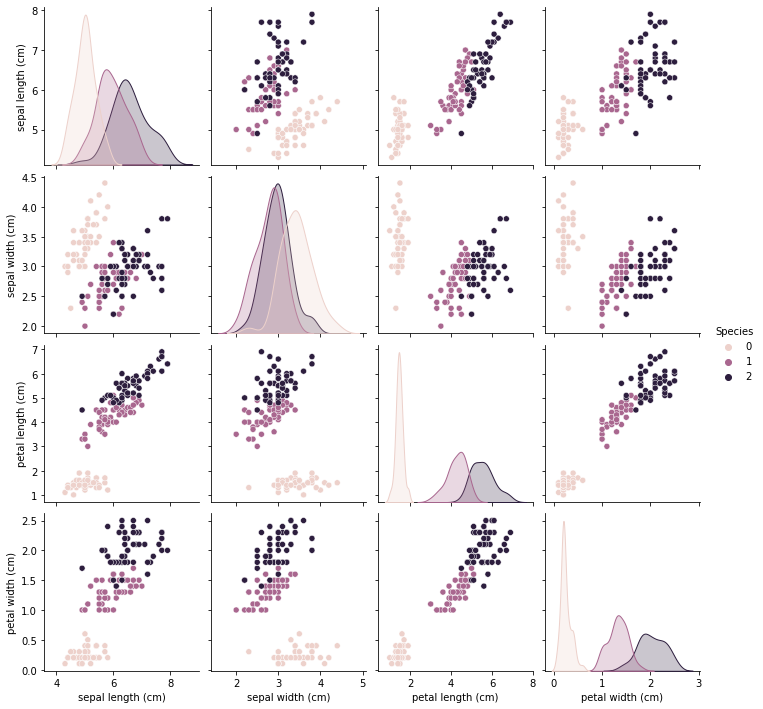

In [60]:
import seaborn as sns
sns.pairplot(df, hue="Species")

In [64]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Species'],
      dtype='object')

In [65]:
new_df = df[df.Species != 0][["sepal length (cm)", "sepal width (cm)", "Species"]] 

In [67]:
new_df.head()

,sepal length (cm),sepal width (cm),Species
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1


In [68]:
new_df.shape

(100, 3)

In [71]:
X = new_df.iloc[:, :-1]
y = new_df.iloc[:,-1]

50     1
51     1
52     1
53     1
54     1
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 100, dtype: int64

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [77]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()

In [78]:
estimators = [("lr", clf1), ("rf",clf2), ("knn", clf3)]

In [79]:
for estimator in estimators:
  x = cross_val_score(estimator[1], X, y, cv=10, scoring="accuracy")
  print(estimator[0], np.round(np.mean(x), 2))

lr 0.75
rf 0.62
knn 0.61


In [80]:
from sklearn.ensemble import VotingClassifier

# Hard Voting

In [82]:
vc = VotingClassifier(estimators = estimators, voting="hard")
x = cross_val_score(vc, X, y, cv=10, scoring="accuracy")
print(np.round(np.mean(x), 2))

0.67


# Soft Voting

In [83]:
vc = VotingClassifier(estimators = estimators, voting="soft")
x = cross_val_score(vc, X, y, cv=10, scoring="accuracy")
print(np.round(np.mean(x), 2))

0.65


### we can also give a parameter called weights to give weightage to diff models

In [84]:
for i in range(1, 4):
  for j in range(1, 4):
    for k in range(1, 4):
      vc = VotingClassifier(estimators=estimators, voting="soft", weights=[i, j, k])
      x = cross_val_score(vc, X, y, cv=10, scoring="accuracy")
      print("for i = {}, j = {}, k = {}".format(i, j, k), np.round(np.mean(x), 2))

for i = 1, j=1, k = 1 0.67
for i = 1, j=1, k = 2 0.64
for i = 1, j=1, k = 3 0.63
for i = 1, j=2, k = 1 0.65
for i = 1, j=2, k = 2 0.65
for i = 1, j=2, k = 3 0.63
for i = 1, j=3, k = 1 0.6
for i = 1, j=3, k = 2 0.64
for i = 1, j=3, k = 3 0.64
for i = 2, j=1, k = 1 0.69
for i = 2, j=1, k = 2 0.66
for i = 2, j=1, k = 3 0.66
for i = 2, j=2, k = 1 0.67
for i = 2, j=2, k = 2 0.64
for i = 2, j=2, k = 3 0.66
for i = 2, j=3, k = 1 0.63
for i = 2, j=3, k = 2 0.66
for i = 2, j=3, k = 3 0.64
for i = 3, j=1, k = 1 0.73
for i = 3, j=1, k = 2 0.68
for i = 3, j=1, k = 3 0.68
for i = 3, j=2, k = 1 0.68
for i = 3, j=2, k = 2 0.68
for i = 3, j=2, k = 3 0.64
for i = 3, j=3, k = 1 0.67
for i = 3, j=3, k = 2 0.65
for i = 3, j=3, k = 3 0.65


### as we can see we are getting highest accuracy at i=3, j=1, k=1. meaning we have to give first algo most weight. and it makes sense since our first algo that is logistic regression was giving us the most accuracy

# Classifiers of same algorithms

In [85]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)

In [86]:
from sklearn.svm import SVC

svm1 = SVC(probability=True, kernel="poly", degree=1)
svm2 = SVC(probability=True, kernel="poly", degree=2)
svm3 = SVC(probability=True, kernel="poly", degree=3)
svm4 = SVC(probability=True, kernel="poly", degree=4)
svm5 = SVC(probability=True, kernel="poly", degree=5)

estimators = [("svm1", svm1), ("svm2", svm2), ("svm3", svm3), ("svm4", svm4), ("svm5", svm5)]

for estimator in estimators:
  x = cross_val_score(estimator[1], X, y, cv=10, scoring="accuracy")
  print(estimator[0], np.round(np.mean(x), 2))

svm1 0.85
svm2 0.85
svm3 0.89
svm4 0.81
svm5 0.86


In [88]:
vc1 = VotingClassifier(estimators=estimators, voting="soft")
x = cross_val_score(vc1, X, y, cv=10, scoring="accuracy")
print(np.round(np.mean(x),2))

0.93


In [89]:
vc2 = VotingClassifier(estimators=estimators, voting="hard")
x = cross_val_score(vc2, X, y, cv=10, scoring="accuracy")
print(np.round(np.mean(x),2))

0.91
